In [4]:
import sklearn

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

diabetes = datasets.load_diabetes()


In [9]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [13]:
df = pd.DataFrame(data=diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

In [14]:
X = df[['bmi']]
y = df['target']


In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
train_X, val_X, train_y, val_y = train_test_split (train_X, train_y, test_size = 0.4, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [21]:
train_X.shape, val_X.shape, test_X.shape

((126, 1), (85, 1), (89, 1))

In [27]:
print("각 독립 변수들 계수(기울기) : ", model.coef_)
print("행렬의 rank : ", model.rank_)
print("행렬의 특이값 : ", model.singular_)
print("모델의 절편 : ", model.intercept_)
print("fit될 때까지 살펴본 feature의 수 : ", model.n_features_in_)

각 독립 변수들 계수(기울기) :  [920.35447381]
행렬의 rank :  1
행렬의 특이값 :  [0.52225687]
모델의 절편 :  152.09711964623855
fit될 때까지 살펴본 feature의 수 :  1


In [32]:
from sklearn.preprocessing import add_dummy_feature #직선의 식을 그리기 위해 필요한 코드

X_new = np.array([[-0.15],[0.25]])
X_new_b = add_dummy_feature(X_new)
theta_best = np.array([[model.intercept_], model.coef_])
y_predict = X_new_b @ theta_best


[[152.09711965]
 [920.35447381]]
[[ 14.04394857]
 [382.1857381 ]]


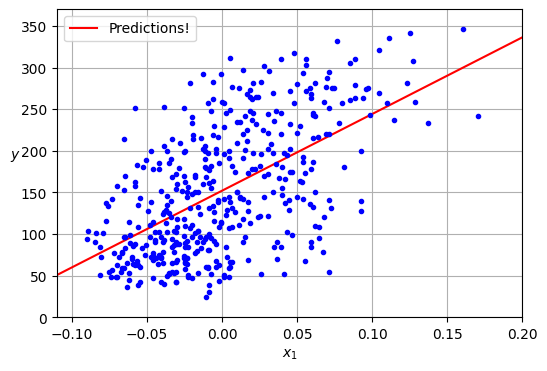

In [41]:
import matplotlib.pyplot as pltplt
plt.figure(figsize = (6,4))
plt.plot(X_new, y_predict, "r-", label = "Predictions!")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([-0.11,0.2,0,370])
plt.grid()
plt.legend(loc="upper left")

plt.show()


In [48]:
print("훈련 데이터셋 R^2 : {} ".format(model.score(train_X, train_y)))
print("평가용 데이터셋 R^2 : {}".format(model.score(val_X, val_y)))

훈련 데이터셋 R^2 : 0.34876366905715994 
평가용 데이터셋 R^2 : 0.30765901092417725


##
모델링 2차 학습 및 평가

In [74]:
X = df[['bmi', 'bp', 's6']]
y = df['target']

In [75]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.4, random_state=42)

In [77]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [78]:
print("훈련 데이터셋 R^2 : {} ".format(model.score(train_X, train_y)))
print("평가용 데이터셋 R^2 : {}".format(model.score(val_X, val_y)))

훈련 데이터셋 R^2 : 0.40393173961222073 
평가용 데이터셋 R^2 : 0.44995306466112284


In [79]:
print(model.coef_)
print(model.intercept_)

[692.88142066 329.50594833 245.39277773]
149.36046192976633


#
모델 최종 성능 평가

In [80]:
print("테스트 데이터셋 R^2 : {}".format(model.score(test_X, test_y)))

테스트 데이터셋 R^2 : 0.3167456319182995


어떤 feature를 쓸 것인지에 대해 완탐을 하는 것 -> grid search라고 볼 수 있다.

correlation을 살펴보면서 어떤 feature를 사용할지 결정할 수 있다.

In [81]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [82]:
X = df[['bmi', 's5','s3']]
y = df['target']

위는 내가 correlation을 바탕으로 이렇게 하면 될 것 같다는 기준으로 (heuristic?하게 고름) feature를 골랐다.
이렇게 돌렸을 때의 결과 역시 큰 차이 나지 않았지만, 최적 값은 아니었던 듯 하다.